## Análisis Método Jacobi vs Método Gauss-Seidel


### Descripción del Método Jacobi

El método Jacobi es un método iterativo que sirve para solucionar sistemas lineales de la forma $Ax = b$, dado un vector inicial $v_0$, este método realiza una transformación de la fila $E_i$ a un despeje de la variable $x_{i}$, es decir, 

$$x_i = -\frac{1}{a_i} \sum_{j = 1, j \neq i}^{n-1} (a_{ij}x_j) + b_i$$

Así para cada $k \geq 1$, se genera los componentes $x^{(k)}_i$, de $X^{(k)}$ a partir de los componentes $X^{k-1}$ por medio de

$$x^{(k)}_i = -\frac{1}{a_i} \sum_{j = 1, j \neq i}^{n-1} (a_{ij}x^{(k-1)}_j) + b_i$$

para $i=1,2,3,4\dots ,n$.

### Construcción del Método Jacobi

El código mostrado abajo realizan el Método Jacobi, donde:

- La primera función realiza la transformación del sistema lineal $Ax = b$ a un sistema donde las filas corresponden al despeje de la variable $x_i$ que lo denotamos $x = Ty + c$.
- La segunda función toma la transformación del sistema lineal a solucionar, un vector inicial, la tolerancia de error, el número de iteraciones y la norma con la cual queremos calcular el error; Para calcular las iteraciones en el método Jacobi y al final retorna una tabla con las aproximaciones y una tabla de errores de cada iteración. 

In [1]:
# Librerias a usar
import matplotlib.pyplot as plt
import numpy as np

In [57]:
# Transforma el sistema Ax = b al sistema Tx = c
def transformar_sistema(A, b):
    if A[0, 0] == 0:
        return print("No es posible realizar la transformación")

    # Inicializar la matriz de transformación T
    T = np.zeros_like(A, dtype=float)

    # Iterar sobre las filas de la matriz A
    for i in range(len(A)):
        # Seleccionar la fila actual y los elementos de la diagonal
        fila_actual = A[i]
        diag_element = fila_actual[i]

        # Despejar xi de la ecuación correspondiente
        for j in range(len(fila_actual)):
            if j != i:
                T[i][j] = -fila_actual[j] / diag_element

        T[i][i] = 0

    c = b / np.diag(A)
    return np.round(T, 4), np.round(c, 4)

In [167]:
# Definición de la función para el método Jacobi
def met_jacobi(T, c, v_0, tol, n_iteration, norm, noise):
    norm_vk = 0
    norm_v0_vk = 0
    error = []
    table_vk = [v_0]
    for i in range(0, n_iteration):
        # Matriz por vector para hallar el vector k-ésimo

        v_k = np.round(np.dot(T, v_0) + c, 4)

        # Calculo de la norma
        if norm == 1:
            norm_v0_vk = np.linalg.norm(v_k - v_0, np.inf)
            norm_vk = np.linalg.norm(v_k, np.inf)
        elif norm == 2:
            norm_v0_vk = np.linalg.norm(v_k - v_0)
            norm_vk = np.linalg.norm(v_k)

        # Calculo del error relativo
        error.append(norm_v0_vk / norm_vk)

        if noise == 0:
            v_0 = v_k
        else:
            #if error[i] > error[i - 1]:
            v_0 = v_k + [np.random.uniform(-20, 20) for _ in range(len(v_k))]
            #else:
            #v_0 = v_k

        table_vk.append(v_0)
        if error[i] <= tol:
            return np.array(table_vk).T, np.array(error)

    return np.array(table_vk).T, np.array(error)

In [4]:
# Ejemplo: Definición del sistema lineal a resolver y el vector inicial v_0

Ax_b = np.array([[10, -1, 2, 0, 6],
                 [-1, 11, -1, 3, 25],
                 [2, -1, 10, -1, -11],
                 [0, 3, -1, 8, 15]])
v_0 = np.array([0, 0, 0, 0])

print(f'El sistema Ax = b esta representado por A:\n{Ax_b[:, :-1]}\nb: {Ax_b[:, -1]}\nEl vector inicial es v_0:{v_0}')

El sistema Ax = b esta representado por A:
[[10 -1  2  0]
 [-1 11 -1  3]
 [ 2 -1 10 -1]
 [ 0  3 -1  8]]
b: [  6  25 -11  15]
El vector inicial es v_0:[0 0 0 0]


In [5]:
# Sacamos su transformación x = Ty + c
T, c = transformar_sistema(Ax_b[:, :-1], Ax_b[:, -1])
print(f'El sistema x = Ty + c esta representado por T:\n{T}\nc: {c}')

El sistema x = Ty + c esta representado por T:
[[ 0.          0.1        -0.2         0.        ]
 [ 0.09090909  0.          0.09090909 -0.27272727]
 [-0.2         0.1         0.          0.1       ]
 [ 0.         -0.375       0.125       0.        ]]
c: [ 0.6         2.27272727 -1.1         1.875     ]


In [6]:
# Ejecutamos el método Jacobi usando la norma uniforme y la norma euclidiana obteniendo
table_vk, error1_jac = met_jacobi(T, c, v_0, tol=10 ** (-3), n_iteration=10, norm=1, noise=0)
table_vk, error2_jac = met_jacobi(T, c, v_0, tol=10 ** (-3), n_iteration=10, norm=2, noise=0)
table_vk

array([[ 0.    ,  0.6   ,  1.0473,  0.9326,  1.0152,  0.989 ,  1.0032,
         0.9981,  1.0006,  0.9997,  1.0001],
       [ 0.    ,  2.2727,  1.7159,  2.0533,  1.9537,  2.0114,  1.9922,
         2.0023,  1.9987,  2.0004,  1.9998],
       [ 0.    , -1.1   , -0.8052, -1.0494, -0.9681, -1.0103, -0.9945,
        -1.002 , -0.999 , -1.0004, -0.9998],
       [ 0.    ,  1.875 ,  0.8852,  1.1309,  0.9738,  1.0214,  0.9944,
         1.0036,  0.9989,  1.0006,  0.9998]])

In [7]:
error1_jac

array([1.00000000e+00, 5.76840142e-01, 1.64320849e-01, 8.04115268e-02,
       2.86864870e-02, 1.35528561e-02, 5.04419917e-03, 2.35152849e-03,
       8.49830034e-04])

In [8]:
error2_jac

array([1.00000000e+00, 5.36736092e-01, 1.81887572e-01, 8.44623379e-02,
       3.37267193e-02, 1.49253401e-02, 6.19069370e-03, 2.68218891e-03,
       1.10494579e-03, 4.66032499e-04])

### Descripción del Método Gauss-Seidel

El método Gauss-Seidel es un método iterativo que sirve para solucionar sistemas lineales de la forma $Ax = b$, dado un vector inicial $v_0$, este método realiza una transformación de la fila $E_i$ a un despeje de la variable $x_{i}$, es decir, 

$$x_i = -\frac{1}{a_i} \sum_{j = 1, j \neq i}^{n-1} (a_{ij}x_j) + b_i$$

Dado que para $i \geq 1$ los valores del componente $x^{(k)}_1, \dots, x^{(k)}_{i-1}$ ya se han calculado, luego podemos usar esas aproximaciones para calcular los componentes siguientes, es decir, calculamos:

$$x^{(k)}_i = -\frac{1}{a_i} (\sum_{j = 1}^{i-1} (a_{ij}x^{(k)}_j) + \sum_{j = i + 1}^{n} (a_{ij}x^{(k-1)}_j) + b_i)$$

para $i=1,2,3,4\dots ,n$.

### Construcción del Método Gauss-Seidel

El código mostrado abajo realizan el método Gauss-Seidel, donde:

- La primera función realiza la transformación del sistema lineal $Ax = b$ a un sistema donde las filas corresponden al despeje de la variable $x_i$ que lo denotamos $x = Ty + c$.
- La segunda función toma la transformación del sistema lineal a solucionar, un vector inicial, la tolerancia de error, el número de iteraciones y la norma con la cual queremos calcular el error; Para calcular las iteraciones en el método Gauss-Seidel y al final retorna una tabla con las aproximaciones y una tabla de errores de cada iteración. 

In [168]:
def met_gauss(T, c, v_0, tol, n_iteration, norm, noise):
    norm_xk = 0
    norm_xk_v0 = 0
    error = []
    table_xk = [v_0]

    for n in range(n_iteration):

        xk = np.zeros_like(c, dtype=float)
        # Calculo del vector x_k
        for i in range(len(T)):

            if i == 0:
                xk[i] = np.round(np.dot(T[i, :], v_0) + c[i], 4)
            elif i == len(T) - 1:
                xk[i] = np.round(np.dot(T[i, :], xk), 4) + np.round(c[i], 4)
            else:
                xk[i] = np.round(np.round(np.dot(T[i, :i], xk[:i]), 4) + np.round(np.dot(T[i, i + 1:], v_0[i + 1:]),
                                                                                  4) + np.round(c[i], 4), 4)

        if norm == 1:
            norm_xk_v0 = np.linalg.norm(xk - v_0, np.inf)
            norm_xk = np.linalg.norm(xk, np.inf)
        if norm == 2:
            norm_xk_v0 = np.linalg.norm(xk - v_0)
            norm_xk = np.linalg.norm(xk)

        error.append(norm_xk_v0 / norm_xk)

        if noise == 0:
            v_0 = xk
        else:
            #if error[n] > error[n - 1]:
            v_0 = xk + [np.random.uniform(-20, 20) for _ in range(len(xk))]
            #else:

        table_xk.append(v_0)

        if error[n] < tol:
            return np.array(table_xk).T, np.array(error)

    return np.array(table_xk).T, np.array(error)

In [10]:
# Realizamos el ejemplo anterior usando Gauss-Seidel, definición del sistema lineal a resolver y el vector inicial v_0

Ax_b = np.array([[10, -1, 2, 0, 6],
                 [-1, 11, -1, 3, 25],
                 [2, -1, 10, -1, -11],
                 [0, 3, -1, 8, 15]])
v_0 = np.array([0, 0, 0, 0])
print(f'El sistema Ax = b esta representado por A:\n{Ax_b[:, :-1]}\nb: {Ax_b[:, -1]}\nEl vector inicial es v_0:{v_0}')

El sistema Ax = b esta representado por A:
[[10 -1  2  0]
 [-1 11 -1  3]
 [ 2 -1 10 -1]
 [ 0  3 -1  8]]
b: [  6  25 -11  15]
El vector inicial es v_0:[0 0 0 0]


In [11]:
# Sacamos su transformación x = Ty + c
T, c = transformar_sistema(Ax_b[:, :-1], Ax_b[:, -1])
print(f'La transformación x=Ty+c es definida por T:\n{T}\nEl vector c:\n{c}')

La transformación x=Ty+c es definida por T:
[[ 0.          0.1        -0.2         0.        ]
 [ 0.09090909  0.          0.09090909 -0.27272727]
 [-0.2         0.1         0.          0.1       ]
 [ 0.         -0.375       0.125       0.        ]]
El vector c:
[ 0.6         2.27272727 -1.1         1.875     ]


In [12]:
table_xk1, error1_gauss = met_gauss(T, c, v_0, tol=10 ** (-3), n_iteration=10, norm=1, noise=0)
_, error2_gauss = met_gauss(T, c, v_0, tol=10 ** (-3), n_iteration=10, norm=2, noise=0)
table_xk1

array([[ 0.    ,  0.6   ,  1.0302,  1.0066,  1.0009,  1.0001],
       [ 0.    ,  2.3272,  2.0369,  2.0035,  2.0003,  2.    ],
       [ 0.    , -0.9873, -1.0144, -1.0026, -1.0003, -1.    ],
       [ 0.    ,  0.8789,  0.9844,  0.9984,  0.9998,  1.    ]])

In [13]:
error1_gauss

array([1.00000000e+00, 2.11203299e-01, 1.66708261e-02, 2.84957256e-03,
       4.00000000e-04])

In [14]:
error2_gauss

array([1.00000000e+00, 1.97514430e-01, 1.69005538e-02, 2.67146710e-03,
       3.50504825e-04])

### Análisis de Convergencia

Realizaré unos ejemplos para observar como se comportan los errores de aproximación, empezaré gráficando los errores para el ejemplo realizado en los dos métodos. 


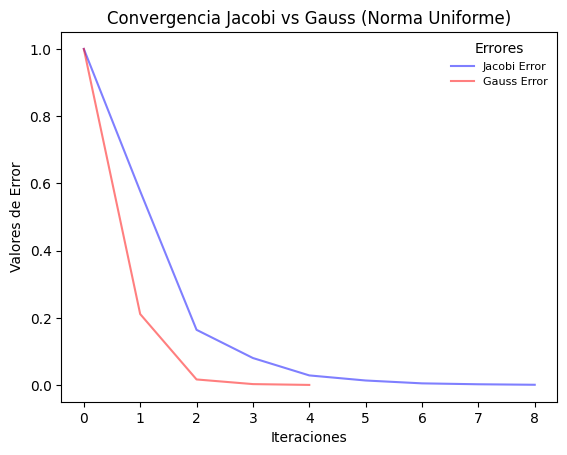

In [15]:
plt.plot(error1_jac, '-', label='Jacobi Error', alpha=0.5, color='blue')
plt.plot(error1_gauss, '-', label='Gauss Error', alpha=0.5, color='red')

plt.title('Convergencia Jacobi vs Gauss (Norma Uniforme)')
plt.xlabel('Iteraciones')
plt.ylabel('Valores de Error')
plt.legend(frameon=False, title='Errores', fontsize=8);

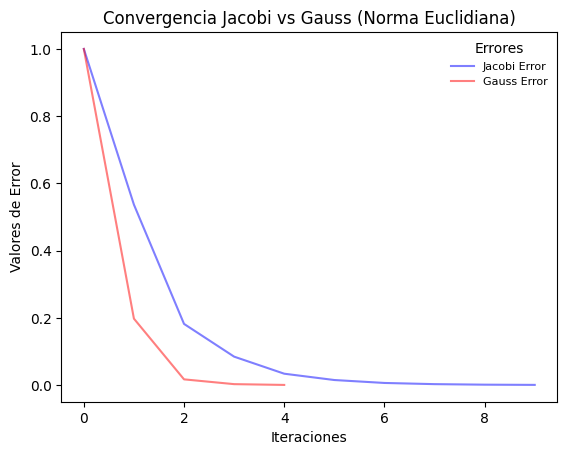

In [16]:
plt.plot(error2_jac, '-', label='Jacobi Error', alpha=0.5, color='blue')
plt.plot(error2_gauss, '-', label='Gauss Error', alpha=0.5, color='red')

plt.title('Convergencia Jacobi vs Gauss (Norma Euclidiana)')
plt.xlabel('Iteraciones')
plt.ylabel('Valores de Error')
plt.legend(frameon=False, title='Errores', fontsize=8);

Podemos observar que en este caso usando las normas uniforme y euclidiana el método Gauss-Seidel los errores disminuyen más rapido en cada iteración teniendo al final que para el método Gauss-Seidel después de la quinta iteración se tiene una aproximación menor a $10^{-3}$, mientras que para el método Jacobi se tiene una aproximación menor al mismo número en la décima iteración.

Miremos qué resultado obtenemos al usar una función que nos genere un sistema lineal con valores aleatorios entre 10 y -10, con vector inicial cero y una tolerancia de $10^{-3}$.

In [41]:
def gen_Ax_b(m, n, low, high):
    Ax_b = np.round(np.array([[np.random.uniform(low, high) for _ in range(n)] for _ in range(m)]), 4)
    return Ax_b

In [42]:
def iter_met(v_0, n, j, noise_init):
    table_errors1_jac = []
    table_errors2_jac = []
    table_errors1_gauss = []
    table_errors2_gauss = []

    print(f"El vector inicial es: {v_0}")

    np.random.seed(0)
    # Un ciclo que nos genera 4 sistemas lineales 4x5 y calcula su solución con los métodos.
    for i in range(n):
        Ax_b = gen_Ax_b(m=4, n=5, low=-10, high=10)

        T, c = transformar_sistema(Ax_b[:, :-1], Ax_b[:, -1])

        _, error1_jac = met_jacobi(T, c, v_0, tol=10 ** (-3), n_iteration=j, norm=1, noise=noise_init)
        _, error1_gauss = met_gauss(T, c, v_0, tol=10 ** (-3), n_iteration=j, norm=1, noise=noise_init)

        _, error2_jac = met_jacobi(T, c, v_0, tol=10 ** (-3), n_iteration=j, norm=2, noise=noise_init)
        _, error2_gauss = met_gauss(T, c, v_0, tol=10 ** (-3), n_iteration=j, norm=2, noise=noise_init)

        table_errors1_jac.append(error1_jac)
        table_errors2_jac.append(error2_jac)

        table_errors1_gauss.append(error1_gauss)
        table_errors2_gauss.append(error2_gauss)

    table_errors1_jac = np.array(table_errors1_jac).T
    table_errors2_jac = np.array(table_errors2_jac).T

    table_errors1_gauss = np.array(table_errors1_gauss).T
    table_errors2_gauss = np.array(table_errors2_gauss).T

    return (table_errors1_jac, table_errors2_jac, table_errors1_gauss, table_errors2_gauss)

In [43]:
table_errors1_jac, table_errors2_jac, table_errors1_gauss, table_errors2_gauss = iter_met(np.array([0, 0, 0, 0]), n=4,
                                                                                          j=20, noise_init=0)

El vector inicial es: [0 0 0 0]


<Figure size 1000x1000 with 0 Axes>

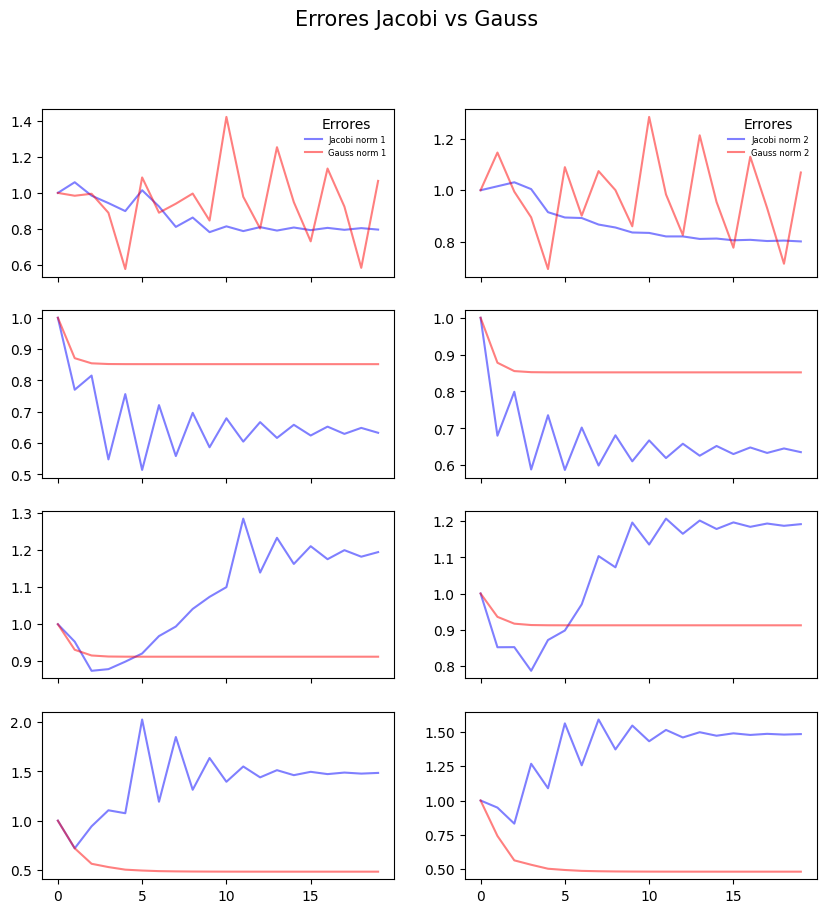

In [44]:
plt.figure(figsize=(10, 10))

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, sharex=True, figsize=(10, 10))

axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]

j = 0
for i in range(0, len(axs), 2):
    axs[i].plot(table_errors1_jac[:, j], '-', label='Jacobi norm 1', c='b', alpha=0.5)
    axs[i].plot(table_errors1_gauss[:, j], '-', label='Gauss norm 1', c='r', alpha=0.5)

    axs[i + 1].plot(table_errors2_jac[:, j], '-', label='Jacobi norm 2', c='b', alpha=0.5)
    axs[i + 1].plot(table_errors2_gauss[:, j], '-', label='Gauss norm 2', c='r', alpha=0.5)

    j += 1

axs[0].legend(frameon=False, title='Errores', fontsize=6)
axs[1].legend(frameon=False, title='Errores', fontsize=6)
fig.suptitle('Errores Jacobi vs Gauss', fontsize=15);

Podemos observar que para los 4 sistemas aleatorios que elegimos no se encuentra una solución menor a la tolerancia establecida que es de $10^{-3}$, esto puede ser debido a la escogencia del vector inicial, por lo tanto tomaremos los mismos sistemas lineales y evaluaremos en un vector aleatorio con valores entre $-10$ y $10$. 

In [47]:
np.random.seed(0)
v_0 = np.array([np.random.uniform(-10, 10) for _ in range(4)])

In [48]:
table_errors1_jac, table_errors2_jac, table_errors1_gauss, table_errors2_gauss = iter_met(v_0, n=4,
                                                                                          j=20, noise_init=0)

El vector inicial es: [0.97627008 4.30378733 2.05526752 0.89766366]


<Figure size 1000x1000 with 0 Axes>

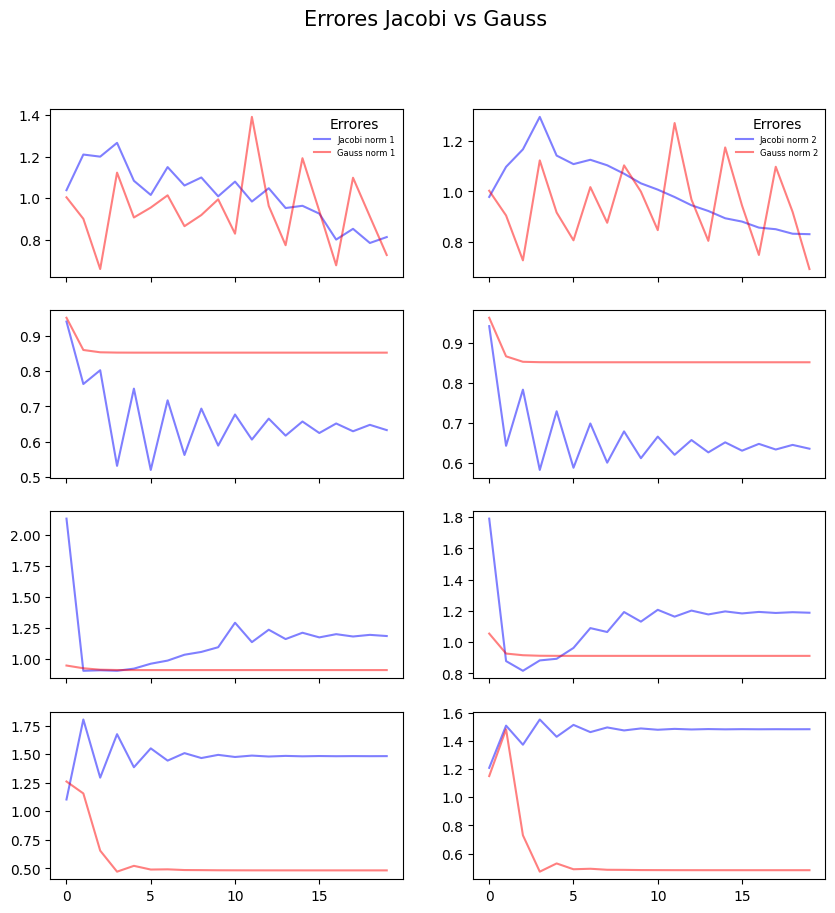

In [49]:
plt.figure(figsize=(10, 10))

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, sharex=True, figsize=(10, 10))

axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]

j = 0
for i in range(0, len(axs), 2):
    axs[i].plot(table_errors1_jac[:, j], '-', label='Jacobi norm 1', c='b', alpha=0.5)
    axs[i].plot(table_errors1_gauss[:, j], '-', label='Gauss norm 1', c='r', alpha=0.5)

    axs[i + 1].plot(table_errors2_jac[:, j], '-', label='Jacobi norm 2', c='b', alpha=0.5)
    axs[i + 1].plot(table_errors2_gauss[:, j], '-', label='Gauss norm 2', c='r', alpha=0.5)

    j += 1

axs[0].legend(frameon=False, title='Errores', fontsize=6)
axs[1].legend(frameon=False, title='Errores', fontsize=6)
fig.suptitle('Errores Jacobi vs Gauss', fontsize=15);

Podemos observar que dependiendo del vector inicial se puede mejorar la convergencia en algunos casos, por lo tanto, haremos un experimento añadiendo un poco de ruido a las soluciones k-ésimas del sistema.

In [148]:
Ax_b = gen_Ax_b(m=4, n=5, low=-10, high=10)
print(f'{Ax_b}\n')

T, c = transformar_sistema(Ax_b[:, :-1], Ax_b[:, -1])
print(f'{T}\n')
print(f'{c}\n')

[[ 8.263   2.2567 -7.8976  0.8317  2.5556]
 [-3.7189  6.56    5.6416  1.5061 -7.0997]
 [ 3.9476  7.907  -4.998   9.1737  5.426 ]
 [-3.9936  2.3364 -3.843  -8.0106  6.483 ]]

[[ 0.     -0.2731  0.9558 -0.1007]
 [ 0.5669  0.     -0.86   -0.2296]
 [ 0.7898  1.582   0.      1.8355]
 [-0.4985  0.2917 -0.4797  0.    ]]

[ 0.3093 -1.0823 -1.0856 -0.8093]



In [149]:
v_0 = np.array([np.random.uniform(-10, 10) for _ in range(4)])
v_0

array([ 3.31614069,  2.28001303, -7.15654239, -2.45245774])

In [179]:
table_vk, error1_jac = met_jacobi(T, c, v_0, tol=10 ** (-3), n_iteration=100, norm=1, noise=1)
table_xk, error1_gauss = met_gauss(T, c, v_0, tol=10 ** (-3), n_iteration=100, norm=1, noise=0)

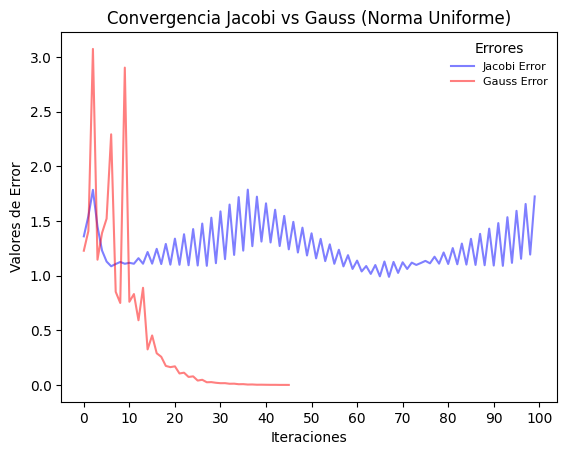

In [180]:
plt.plot(error1_jac, '-', label='Jacobi Error', alpha=0.5, color='blue')
plt.plot(error1_gauss, '-', label='Gauss Error', alpha=0.5, color='red')

plt.xticks(range(0, 110, 10))
plt.title('Convergencia Jacobi vs Gauss (Norma Uniforme)')
plt.xlabel('Iteraciones')
plt.ylabel('Valores de Error')
plt.legend(frameon=False, title='Errores', fontsize=8);

In [181]:
error1_jac.min()

0.9895895911190407

In [182]:
error1_gauss.min()

0.0009589891126530348